In [ ]:
import pandas as pd


3.1 Warming Up Exercises - Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.

In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/python/bank .csv")
#column with dttypes=object
df.describe()



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 2. Check info of the DataFrame and identify following:
 (a) columns with dtypes=object

In [7]:
# Identify columns with dtype=object
object_columns = df.select_dtypes(include='object').columns
print("Columns with dtype=object:", object_columns.tolist())


Columns with dtype=object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


 (b) unique values of those columns

In [8]:
#unique values for object columns
for col in object_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['unknown' 'cellular' 'telephone']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique values in y: ['no' 'yes']


 (c) check for the total number of null values in each column.

In [9]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)


Null values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”

In [10]:
numeric_df = df.drop(columns=object_columns)

# Save the new DataFrame to a CSV file
numeric_df.to_csv('banknumericdata.csv', index=False)
print("Numeric DataFrame saved as 'banknumericdata.csv'")


Numeric DataFrame saved as 'banknumericdata.csv'


 4. Read ”banknumericdata.csv” and Find the summary statistics

In [11]:
numeric_data = pd.read_csv('/content/drive/MyDrive/python/bank .csv')

# Get summary statistics
summary_statistics = numeric_data.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

 Problem 2- Data Imputations:
 Complete all the following Task:
 • Dataset for the Task: "medical_student.csv"
 1. Load the provided dataset and import in pandas DataFrame

In [12]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/python/medical_students_dataset.csv')
df.info()
missing_values=df.isnull().sum()
print("Missing Values:")
print(missing_values)

for col in missing_values[missing_values > 0].index:
    if df[col].dtype == 'object':  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode
        print(f"Filled missing values in column '{col}' with its mode.")
    else:  # For numerical columns
        df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean
        print(f"Filled missing values in column '{col}' with its mean.")

print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
df.duplicated().sum()

df.to_csv('cleaned_medical_students_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Missing Values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type

<ipython-input-12-e77361c48bea>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean
<ipython-input-12-e77361c48bea>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

12572


In [13]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/python/Titanic-Dataset.csv')

# Subset the DataFrame for specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Filter rows where 'Pclass' equals 1 (first-class passengers)
first_class_df = subset_df[subset_df['Pclass'] == 1]


# Compute mean, median, max, and min for the 'Fare' column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

# Print results
print("Fare Statistics for First-Class Passengers:")
print(f"Mean: {fare_mean}")
print(f"Median: {fare_median}")
print(f"Maximum: {fare_max}")
print(f"Minimum: {fare_min}")


# Count null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age' column: {null_age_count}")

# Drop rows where 'Age' is null
cleaned_df = first_class_df.dropna(subset=['Age'])

# Print updated DataFrame info
print("\nUpdated DataFrame after dropping rows with null 'Age' values:")
print(cleaned_df.info())

# Step 1: One-hot encoding for the 'Embarked' column
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Step 2: Add the new columns to the original DataFrame
df = pd.concat([df, embarked_dummies], axis=1)

# Step 3: Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

# Step 4: Print the first few rows of the modified DataFrame
print("Modified DataFrame:")
print(df.head())


Fare Statistics for First-Class Passengers:
Mean: 84.1546875
Median: 60.287499999999994
Maximum: 512.3292
Minimum: 0.0
Number of null values in 'Age' column: 30

Updated DataFrame after dropping rows with null 'Age' values:
<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 1 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      186 non-null    object 
 1   Pclass    186 non-null    int64  
 2   Sex       186 non-null    object 
 3   Age       186 non-null    float64
 4   Fare      186 non-null    float64
 5   Survived  186 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 10.2+ KB
None
Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex

 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-14-a109460e5c99>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


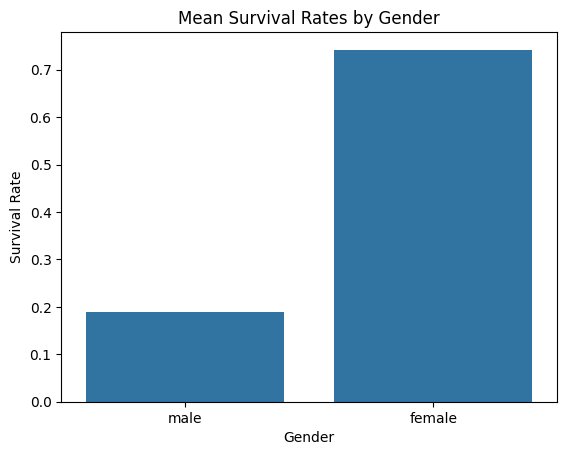

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/python/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Calculate mean survival rates by gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_gender)

# Visualization of survival distributions by gender
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Mean Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

 Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-7-5ba3ace9fc4c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='bar', data=df, ci=None)


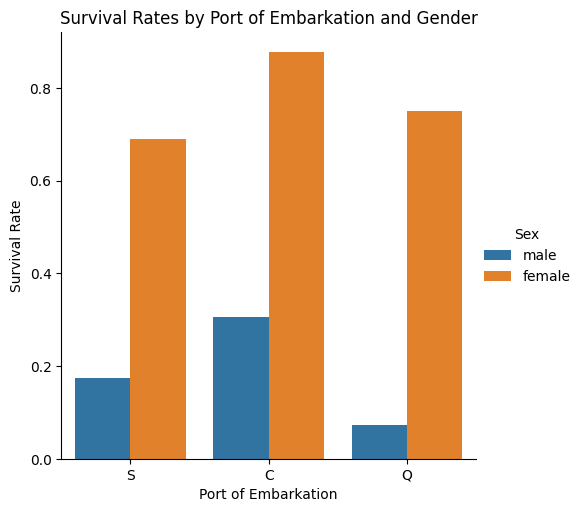

In [ ]:
# Visualization of survival distributions by port of embarkation and gender
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind='bar', data=df, ci=None)
plt.title('Survival Rates by Port of Embarkation and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')
plt.show()

 Problem- 6{Optional}:
 Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
 ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
 and age group. Draw a visualization using a any plotting library to represent this graphically

<ipython-input-8-13c65972ed1f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


Survival rates by Age Group and Passenger Class:
Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


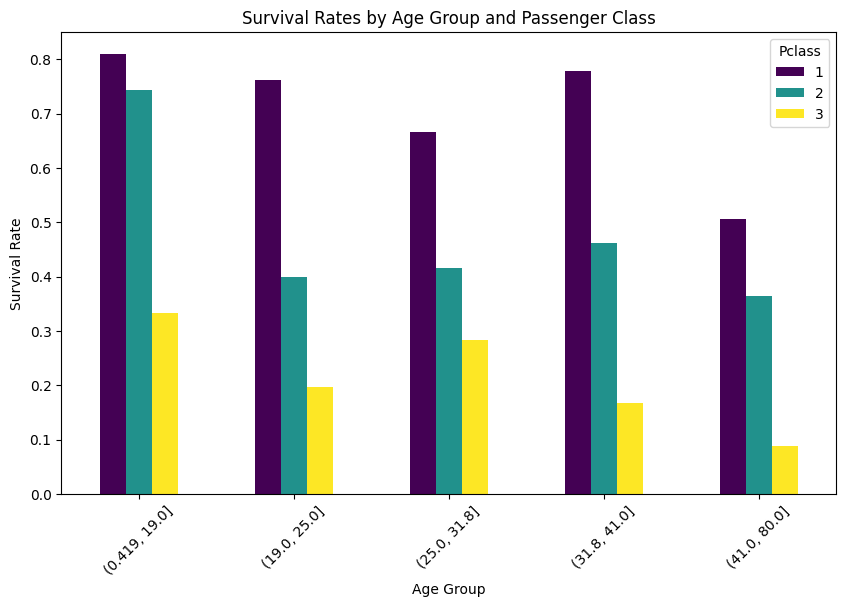

In [ ]:
# Create age quantiles
df['AgeGroup'] = pd.qcut(df['Age'], q=5)

# Calculate survival rates by AgeGroup and Pclass
survival_rates = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print("Survival rates by Age Group and Passenger Class:")
print(survival_rates)

# Visualization of survival rates by AgeGroup and Pclass
survival_rates.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Pclass')
plt.show()